# Coleta/Extração


In [ ]:
import requests

url = "https://swapi.py4e.com/api/people/"

response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    print(data)
else:
    print("Error: Could not retrieve data from API.")


{'count': 87, 'next': 'https://swapi.py4e.com/api/people/?page=2', 'previous': None, 'results': [{'name': 'Luke Skywalker', 'height': '172', 'mass': '77', 'hair_color': 'blond', 'skin_color': 'fair', 'eye_color': 'blue', 'birth_year': '19BBY', 'gender': 'male', 'homeworld': 'https://swapi.py4e.com/api/planets/1/', 'films': ['https://swapi.py4e.com/api/films/1/', 'https://swapi.py4e.com/api/films/2/', 'https://swapi.py4e.com/api/films/3/', 'https://swapi.py4e.com/api/films/6/', 'https://swapi.py4e.com/api/films/7/'], 'species': ['https://swapi.py4e.com/api/species/1/'], 'vehicles': ['https://swapi.py4e.com/api/vehicles/14/', 'https://swapi.py4e.com/api/vehicles/30/'], 'starships': ['https://swapi.py4e.com/api/starships/12/', 'https://swapi.py4e.com/api/starships/22/'], 'created': '2014-12-09T13:50:51.644000Z', 'edited': '2014-12-20T21:17:56.891000Z', 'url': 'https://swapi.py4e.com/api/people/1/'}, {'name': 'C-3PO', 'height': '167', 'mass': '75', 'hair_color': 'n/a', 'skin_color': 'gold'

# ETL dos Dados

In [ ]:
import requests

url = "https://swapi.py4e.com/api/people/"

response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    # Limpeza de dados
    cleaned_data = [d for d in data["results"] if d["height"] != "unknown"]
    # Formatação
    formatted_data = [{"name": d["name"], "height": int(d["height"])} for d in cleaned_data]
    # Criação de colunas
    for d in formatted_data:
        birth_year = d.get("birth_year", "unknown")
        if birth_year != "unknown":
            age = 2023 - int(birth_year)
            d["age"] = age
    print(formatted_data)
else:
    print("Error: Could not retrieve data from API.")


[{'name': 'Luke Skywalker', 'height': 172}, {'name': 'C-3PO', 'height': 167}, {'name': 'R2-D2', 'height': 96}, {'name': 'Darth Vader', 'height': 202}, {'name': 'Leia Organa', 'height': 150}, {'name': 'Owen Lars', 'height': 178}, {'name': 'Beru Whitesun lars', 'height': 165}, {'name': 'R5-D4', 'height': 97}, {'name': 'Biggs Darklighter', 'height': 183}, {'name': 'Obi-Wan Kenobi', 'height': 182}]


# Json/Pandas/DataFrame

In [ ]:
import pandas as pd
import json

# Dados após o processo de ETL
data = [
    {"name": "Luke Skywalker", "height": 172, "age": 23},
    {"name": "Leia Organa", "height": 150, "age": 23},
    {"name": "Han Solo", "height": 180, "age": 29}
]

# Transforme os dados em uma estrutura JSON
json_data = json.dumps(data)

# Converta o JSON em um DataFrame do pandas
df = pd.read_json(json_data)

print(df)


             name  height  age
0  Luke Skywalker     172   23
1     Leia Organa     150   23
2        Han Solo     180   29


# Dataframe para arquivo CSV


In [ ]:

df.to_csv('data.csv', index=False)


O arquivo data.csv foi criado com sucesso.


# CSV para MongoDB


In [ ]:
!pip install pymongo


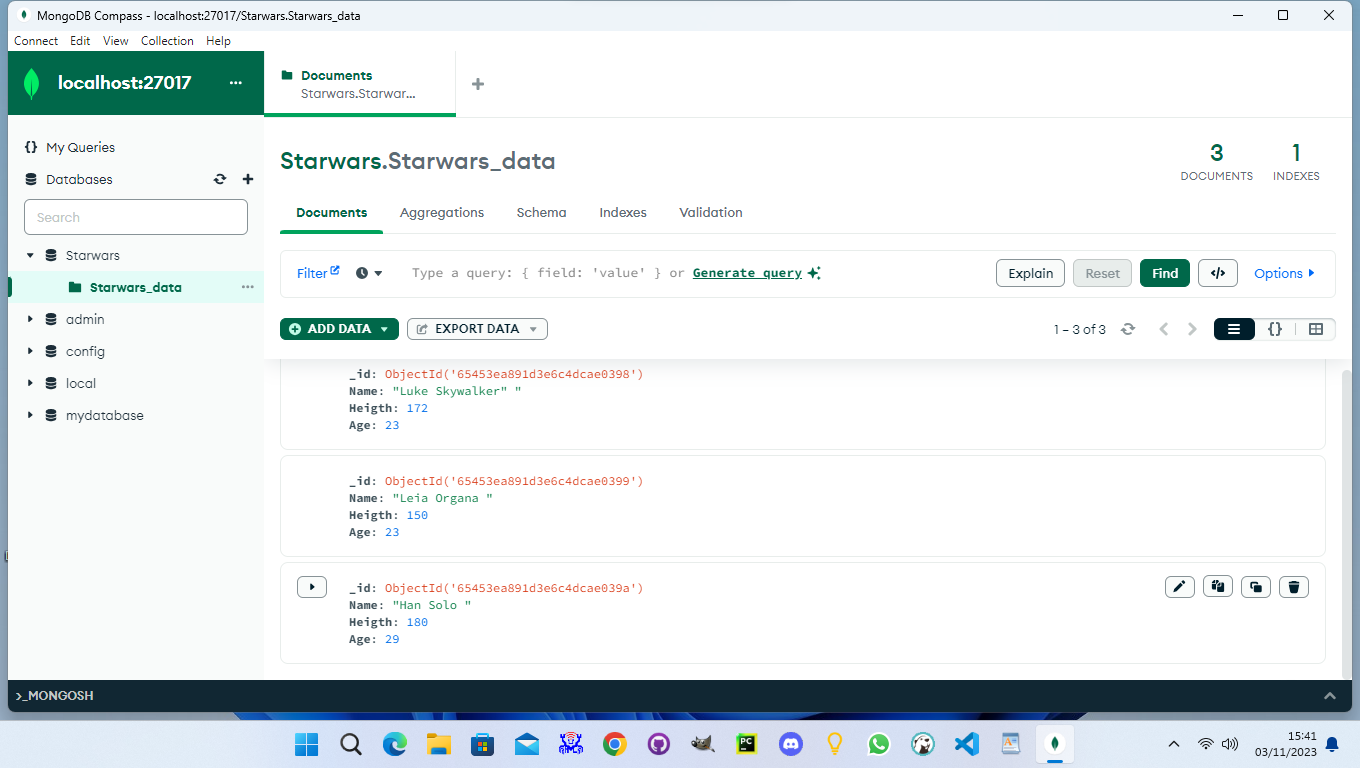